<a href="https://colab.research.google.com/github/AysenGC/Projects/blob/main/Ultimate_Technologies_Inc__Time_Series_Aysen_to_be_continued_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Introduction

Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

**For EDA step:**

The dataset logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.Illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

**For Experiments and Metrics Design:**

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day.

On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a) how you will implement the experiment b) what statistical test(s) you will conduct to verify the significance of the observation c) how you would interpret the results and provide recommendations to the city operations team along with any caveats. Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.



**For Predictive Modeling:**

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).


Feature description: 

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

##2.EDA

##2.1. Logins Dataset 

In [1]:
#Importing the packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importing the dataset
logins = "/content/logins.json"
df = pd.read_json(logins,dtype=['datetime'])
df.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [3]:
#Checking the entries, data types and memory usage
df['login_time'] = pd.to_datetime(df['login_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
#Checking for missing time values 
df[(df.login_time.dt.hour == 0) & (df.login_time.dt.minute == 0) & (df.login_time.dt.second == 0)].login_time

32456   1970-02-15
37739   1970-02-21
Name: login_time, dtype: datetime64[ns]

In [5]:
#Dropping the two entries with missing time values
df = df[~((df.login_time.dt.hour == 0) & (df.login_time.dt.minute == 0) & (df.login_time.dt.second == 0))]

In [6]:
#Checking if dropped
df.count()

login_time    93140
dtype: int64

In [7]:
#Checking if there is any date values missing 
df[(df.login_time.dt.day == 0) | (df.login_time.dt.month == 0) | (df.login_time.dt.year == 0)].login_time

Series([], Name: login_time, dtype: datetime64[ns])

In [8]:
#Unique elements:
data = df['login_time']
print('Unique elements: {0} out of {1}'.format(data.nunique(), len(data)))

Unique elements: 92263 out of 93140


In [9]:
#Descriptive stats
data.describe(datetime_is_numeric=True)

count                            93140
mean     1970-02-26 19:09:56.103027700
min                1970-01-01 20:12:16
25%         1970-02-04 10:37:08.500000
50%                1970-03-01 06:35:23
75%                1970-03-22 04:01:26
max                1970-04-13 18:57:38
Name: login_time, dtype: object

In [10]:
#Generating counts
counts = data.value_counts().sort_index(ascending=True)
counts

1970-01-01 20:12:16    1
1970-01-01 20:13:18    1
1970-01-01 20:16:10    1
1970-01-01 20:16:36    1
1970-01-01 20:16:37    1
                      ..
1970-04-13 18:48:52    1
1970-04-13 18:50:19    1
1970-04-13 18:54:02    1
1970-04-13 18:54:23    1
1970-04-13 18:57:38    1
Name: login_time, Length: 92263, dtype: int64

In [11]:
#Aggregating count for 15-minute intervals

counts_15 = counts.groupby(pd.Grouper(freq='15Min')).agg('sum')
counts_15 = counts_15.sort_index(ascending=True)
print("Data Count Grouped by 15-minute Intervals")
print(counts_15)

count_start = counts_15.index.min()
count_end = counts_15.index.max()
print("\nStart and End Points for 15-minute Intervals")
print("Start: {0}\nEnd:   {1}".format(str(count_start), str(count_end)))

print("\nIntervals with Zero Count: {}".format(counts_15[counts_15==0].count()))


Data Count Grouped by 15-minute Intervals
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, Name: login_time, Length: 9788, dtype: int64

Start and End Points for 15-minute Intervals
Start: 1970-01-01 20:00:00
End:   1970-04-13 18:45:00

Intervals with Zero Count: 407


In [12]:
df = pd.DataFrame(counts_15)
df.rename(mapper={'login_time':'login_count'}, axis=1, inplace=True)

In [13]:
#Desciptive statistics of logins
df.describe()

,login_count
count,9788.000000
mean,9.515734
std,8.328586
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


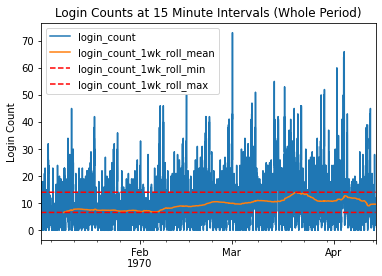

In [14]:
df[['login_count_1wk_roll_mean','login_count_1wk_roll_std']] = df['login_count'].rolling(pd.Timedelta(value='1W')).agg(['mean', 'std'])
df['login_count'].plot();
df.loc[df.index.min()+pd.Timedelta(value='1W'):,'login_count_1wk_roll_mean'].plot()
df['login_count_1wk_roll_min'] = df.loc[df.index.min()+pd.Timedelta(value='1W'):,'login_count_1wk_roll_mean'].min()
df['login_count_1wk_roll_min'].plot(color='r',style='--')
df['login_count_1wk_roll_max'] = df.loc[df.index.min()+pd.Timedelta(value='1W'):,'login_count_1wk_roll_mean'].max()
df['login_count_1wk_roll_max'].plot(color='r',style='--')
plt.ylabel('Login Count')
plt.title('Login Counts at 15 Minute Intervals (Whole Period)');
plt.legend();
df.drop(labels=['login_count_1wk_roll_min', 'login_count_1wk_roll_max'], axis=1, inplace=True)

###The graph demonstrates the login counts over the whole period with weekly rolling means, minimums and maximums.

###The graph shows that there is a weekly cycle, peak use times due to imporant holidays/events etc. and also there is an an overall upward going trend of number of logins. 

###The graph also shows some zero login_counts. No-logins can be interpreted as downtime, no access to connection etc.

###The weekly changes should be carefully investigated.


##3.Experiments and Metrics Design


Question1:

*What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?*

The operations managers is to encourage the drivers to be available in both cities. As the key measure of success, I would choose the proportion of rides that result in a toll charge compared to the total number of rides on weekend. The difference is going to clearify whether or not drivers are actually crossing the toll bridge more often to pick up riders on the other side.


With that said, I would also measure the ROI of implementing this.
The ROI would measure the efficiency or the profitability of reimbursing the two way toll fees on the weekends. Lets assume that the duration of the observation/experiment is decided as 4 weeks. The ROI is the division of incremental net revenue from the 4 weeks to cost of toll reimbursements. The total revenue will be number of rides x ride price. If we subtract the drivers revenue from the total revenue, that is the net revenue of the Ultimate Inc.(very roughly).In short, pre/post increase in net revenue, number of active drivers in both cities in weekends, total cost of reimbursements will be the main factors that will shape the ROI.




Question2:

*Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a) how you will implement the experiment b) what statistical test(s) you will conduct to verify the significance of the observation c) how you would interpret the results and provide recommendations to the city operations team along with any caveats. Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.*

a. For the experiment, I would randomly divide the drivers into two groups: control group and experiment group. 
The control group will not be given the reimbursement.
The experiment group will be given the reimbursement.

The test period will be 4 weeks as mentioned above. 

b. The null hypothesis would be that there is no change in the proportion of rides resulting in a toll charge.
The alternate hypothesis would be that the test group has a different proportion than the control group.

A t-test would help me to compare the mean values of two groups, and as a result, the means and standard deviations of two groups would be compared. The both results should have different mean and standard deviation.

How does a t-test work? Starting with choosing a random sample from each of the two datasets, it creates the problem statement by assuming a null hypothesis that the two means are equal. Proceeding from the applicable formulas, certain values are calculated and compared against the standard values, and the null hypothesis is accepted or rejected.

It is important to point out that the t-test relies on several assumptions. It assumes that the samples are respresentatives of the datasets, distributions are normal distribution, and the variance is homogeneous.

A two-sided t-test would be more feasible which evades an increase in type I error in a one-sided test that only looks for the proportion being greater in the test group. 

Also, we need to know whether the proportion is less in the test group even though we don't expect that to happen.

The significance level(alpha), the probability of rejecting the null hypothesis, will be .05, which would correspond to .025 on each tail of the test. 

I would report the 95% confidence interval of the difference in proportion so we know whether the test group has a higher or lower proportion than the control if they are not equal.

c.The result of the t-test is evidence to reject/acccept the null hypothesis. Higher values of t indicates that there is a large difference between the datasets while lower values of t indicates that the patterns are similar.

I would report the confidence interval of the difference of proportions and explain to them we have a 95% probability of the actual difference falling between these values.

Same approach would be suitable to analyze the difference in mean profit per ride to see if there was a statistically significant change with the toll reimbursements.

With a significance level of .05, the values we measure have a 5% chance of happening due to random chance and have nothing to do with the toll reimbursement.



##4.Predictive Modeling


In [15]:
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [16]:
ultimate = pd.read_json("/content/ultimate_data_challenge.json")
ultimate.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [17]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [18]:
#Descriptive statistics of numeric values
ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


There are some missing values in average rating of driver, phone, and average rating by driver columns. The missing values make about 15% of the data, so instead of dropping them, imputation with mean values later on, would help me to keep the rest of the useful data.


In [19]:
ultimate.last_trip_date = pd.to_datetime(ultimate.last_trip_date)
ultimate.signup_date = pd.to_datetime(ultimate.signup_date)

In [20]:
ultimate.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


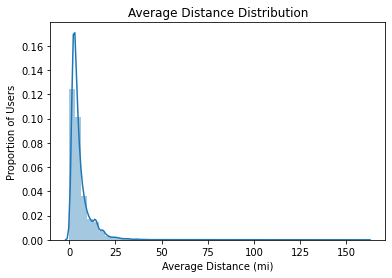

In [21]:
sns.distplot(ultimate['avg_dist'])
plt.title('Average Distance Distribution')
plt.xlabel('Average Distance (mi)')
plt.ylabel('Proportion of Users')
plt.show()

In [22]:
ultimate[ultimate.avg_dist == 0.0]['avg_dist'].count()

150

Let's investigate the number of trips that were actually exposed to a possible rounding error. These are the trips between 0 miles and 0.5 miles.

In [23]:
ultimate[(ultimate.avg_dist < 0.5) & (ultimate.avg_dist > 0.0)]['avg_dist'].head(10)

563     0.08
857     0.42
944     0.47
1020    0.40
1196    0.49
1203    0.01
1223    0.43
1230    0.23
1312    0.02
1435    0.01
Name: avg_dist, dtype: float64

The outcome shows that there are thousands of trips that had some mileage, but since the avg distance was very small, disregarded.



In [24]:
ultimate[(ultimate.avg_dist == 0) & (ultimate.trips_in_first_30_days != 0)][['avg_dist', 
                                                'trips_in_first_30_days']].groupby(['trips_in_first_30_days']).count()

,avg_dist
trips_in_first_30_days,
1,92
2,2


Avg_dist == 0 is likely bad data where trips_in_first_30_days > 0. It is not being rounded as evidenced by the values below 0.5 for many users.

In [25]:
ultimate[ultimate.trips_in_first_30_days > 45][['avg_dist', 'trips_in_first_30_days']].sort_values('trips_in_first_30_days', 
                                                                                        ascending=False)

,avg_dist,trips_in_first_30_days
18514,2.02,125
99,2.86,73
3030,2.32,71
29070,1.45,63
48804,2.30,58
45489,3.65,56
36917,3.51,56
29043,3.39,55
17942,3.27,55
33488,2.91,54


In [26]:
ultimate[ultimate.avg_surge > 4.0][['surge_pct', 'avg_surge', 'city']].sort_values('avg_surge', ascending=False)

,surge_pct,avg_surge,city
13861,100.0,8.00,Winterfell
30477,100.0,5.75,Winterfell
21894,100.0,5.00,Winterfell
19191,100.0,5.00,Winterfell
47052,100.0,5.00,Winterfell
2817,100.0,5.00,Winterfell
49383,100.0,5.00,Winterfell
1405,100.0,4.75,Winterfell
21742,100.0,4.50,Winterfell
15334,100.0,4.50,Winterfell


It looks like Winterfell is a high demand area, all requests were made during surge times.


In [27]:
ultimate['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [28]:
ultimate['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

Null ratings and phones: impute to fill nulls.
Bad 0 values in avg_dist, trips_in_first_30_days: change to null then impute to fill nulls.
Outliers in avg_surge, trips_in_first_30_days: drop the two outliers.
Target is boolean last_trip_date is in last 30 days of data.

In [29]:
#Deleting the two outliers 
clean_ultimate = ultimate[(ultimate.avg_surge < 8)]
clean_ultimate = clean_ultimate[clean_ultimate.trips_in_first_30_days < 125]

In [30]:
ultimate.shape, clean_ultimate.shape

((50000, 12), (49998, 12))

In [32]:
clean_ultimate[(clean_ultimate.avg_dist == 0) & (clean_ultimate.trips_in_first_30_days > 0)]['avg_dist'].count()

94

In [33]:
clean_ultimate.loc[((clean_ultimate.avg_dist == 0) & (clean_ultimate.trips_in_first_30_days > 0)), 'avg_dist'] = None

In [34]:
clean_ultimate[(clean_ultimate.avg_dist == 0) & (clean_ultimate.trips_in_first_30_days > 0)]['avg_dist'].count()

0

In [35]:
clean_ultimate[(clean_ultimate.trips_in_first_30_days == 0) & (clean_ultimate.avg_dist > 0)]['trips_in_first_30_days'].count()

15334

In [36]:
clean_ultimate.loc[((clean_ultimate.trips_in_first_30_days == 0) & (clean_ultimate.avg_dist > 0)), 'trips_in_first_30_days'] = None

In [37]:
clean_ultimate[(clean_ultimate.avg_dist == 0) & (clean_ultimate.trips_in_first_30_days > 0)]['avg_dist'].count()

0

Categorical data to numeric data, dates to days:

In [38]:
phone_int = {"Android": 1, "iPhone": 2, None: None}
city_int = {"Astapor": 1, "King\'s Landing": 2, "Winterfell":3}

In [39]:
clean_ultimate['phone_int'] = clean_ultimate.apply(lambda row: phone_int[row['phone']], axis=1)
print('phone_int: \n{}\nphone: \n{}'.format(clean_ultimate['phone_int'].value_counts(), clean_ultimate['phone'].value_counts()))

phone_int: 
2.0    34580
1.0    15022
Name: phone_int, dtype: int64
phone: 
iPhone     34580
Android    15022
Name: phone, dtype: int64


In [40]:
clean_ultimate['city_int'] = clean_ultimate.apply(lambda row: city_int[row['city']], axis=1)
print('city_int: \n{}\ncity: \n{}'.format(clean_ultimate['city_int'].value_counts(), clean_ultimate['city'].value_counts()))

city_int: 
3    23335
1    16534
2    10129
Name: city_int, dtype: int64
city: 
Winterfell        23335
Astapor           16534
King's Landing    10129
Name: city, dtype: int64


In [41]:
jan_1 = datetime.strptime('Jan 1 2014', '%b %d %Y')
clean_ultimate['signup_days_since_jan_1'] = clean_ultimate.apply(lambda row: (row['signup_date'] - jan_1).days, axis=1)
clean_ultimate['last_trip_days_since_jan_1'] = clean_ultimate.apply(lambda row: (row['last_trip_date'] - jan_1).days, axis=1)
clean_ultimate.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49998 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   city                        49998 non-null  object        
 1   trips_in_first_30_days      34664 non-null  float64       
 2   signup_date                 49998 non-null  datetime64[ns]
 3   avg_rating_of_driver        41876 non-null  float64       
 4   avg_surge                   49998 non-null  float64       
 5   last_trip_date              49998 non-null  datetime64[ns]
 6   phone                       49602 non-null  object        
 7   surge_pct                   49998 non-null  float64       
 8   ultimate_black_user         49998 non-null  bool          
 9   weekday_pct                 49998 non-null  float64       
 10  avg_dist                    49904 non-null  float64       
 11  avg_rating_by_driver        49797 non-null  float64   

In [43]:
clean_ultimate['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

Assume this data was pulled on 7/1/14 and use that as the basis for creating the 'active' labels for modeling. This fits as we're looking for the fraction of users active after 6 months and our signup period begins 1/1/14.

In [44]:
last_date = ultimate['last_trip_date'].max()
clean_ultimate['active'] = clean_ultimate.apply(lambda row: (last_date - row['last_trip_date']).days <= 30, axis=1)

In [45]:
clean_ultimate[['last_trip_date', 'active']].head(10)

,last_trip_date,active
0,2014-06-17,True
1,2014-05-05,False
2,2014-01-07,False
3,2014-06-29,True
4,2014-03-15,False
5,2014-06-06,True
6,2014-01-25,False
7,2014-01-29,False
8,2014-02-01,False
9,2014-01-05,False


###1. Fraction of users who are active after 6 months

In [46]:
round(clean_ultimate[clean_ultimate['active']]['active'].count()/clean_ultimate['active'].count(), 3)

0.376

In [47]:
clean_imp = clean_ultimate[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'city_int', 
                      'last_trip_days_since_jan_1', 'phone_int', 'signup_days_since_jan_1', 'surge_pct', 
                      'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct', 'active']]

In [48]:
clean_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49998 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_dist                    49904 non-null  float64
 1   avg_rating_by_driver        49797 non-null  float64
 2   avg_rating_of_driver        41876 non-null  float64
 3   avg_surge                   49998 non-null  float64
 4   city_int                    49998 non-null  int64  
 5   last_trip_days_since_jan_1  49998 non-null  int64  
 6   phone_int                   49602 non-null  float64
 7   signup_days_since_jan_1     49998 non-null  int64  
 8   surge_pct                   49998 non-null  float64
 9   trips_in_first_30_days      34664 non-null  float64
 10  ultimate_black_user         49998 non-null  bool   
 11  weekday_pct                 49998 non-null  float64
 12  active                      49998 non-null  bool   
dtypes: bool(2), float64(8), int64(3

In [50]:
clean_imp.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_int,last_trip_days_since_jan_1,phone_int,signup_days_since_jan_1,surge_pct,trips_in_first_30_days,weekday_pct
count,49904.000000,49797.000000,41876.000000,49998.000000,49998.000000,49998.000000,49602.000000,49998.000000,49998.000000,34664.000000,49998.000000
mean,5.807822,4.778153,4.601636,1.074624,2.136025,108.335513,1.697149,15.545282,8.847602,3.282483,60.925081
std,5.707266,0.446660,0.617099,0.220173,0.882567,61.717485,0.459496,8.753878,19.955031,4.124249,37.081800
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.430000,4.700000,4.300000,1.000000,1.000000,44.000000,1.000000,8.000000,0.000000,1.000000,33.300000
50%,3.890000,5.000000,4.900000,1.000000,2.000000,127.000000,2.000000,16.000000,0.000000,2.000000,66.700000
75%,6.950000,5.000000,5.000000,1.050000,3.000000,168.000000,2.000000,23.000000,8.600000,4.000000,100.000000
max,160.960000,5.000000,5.000000,5.750000,3.000000,181.000000,2.000000,30.000000,100.000000,73.000000,100.000000


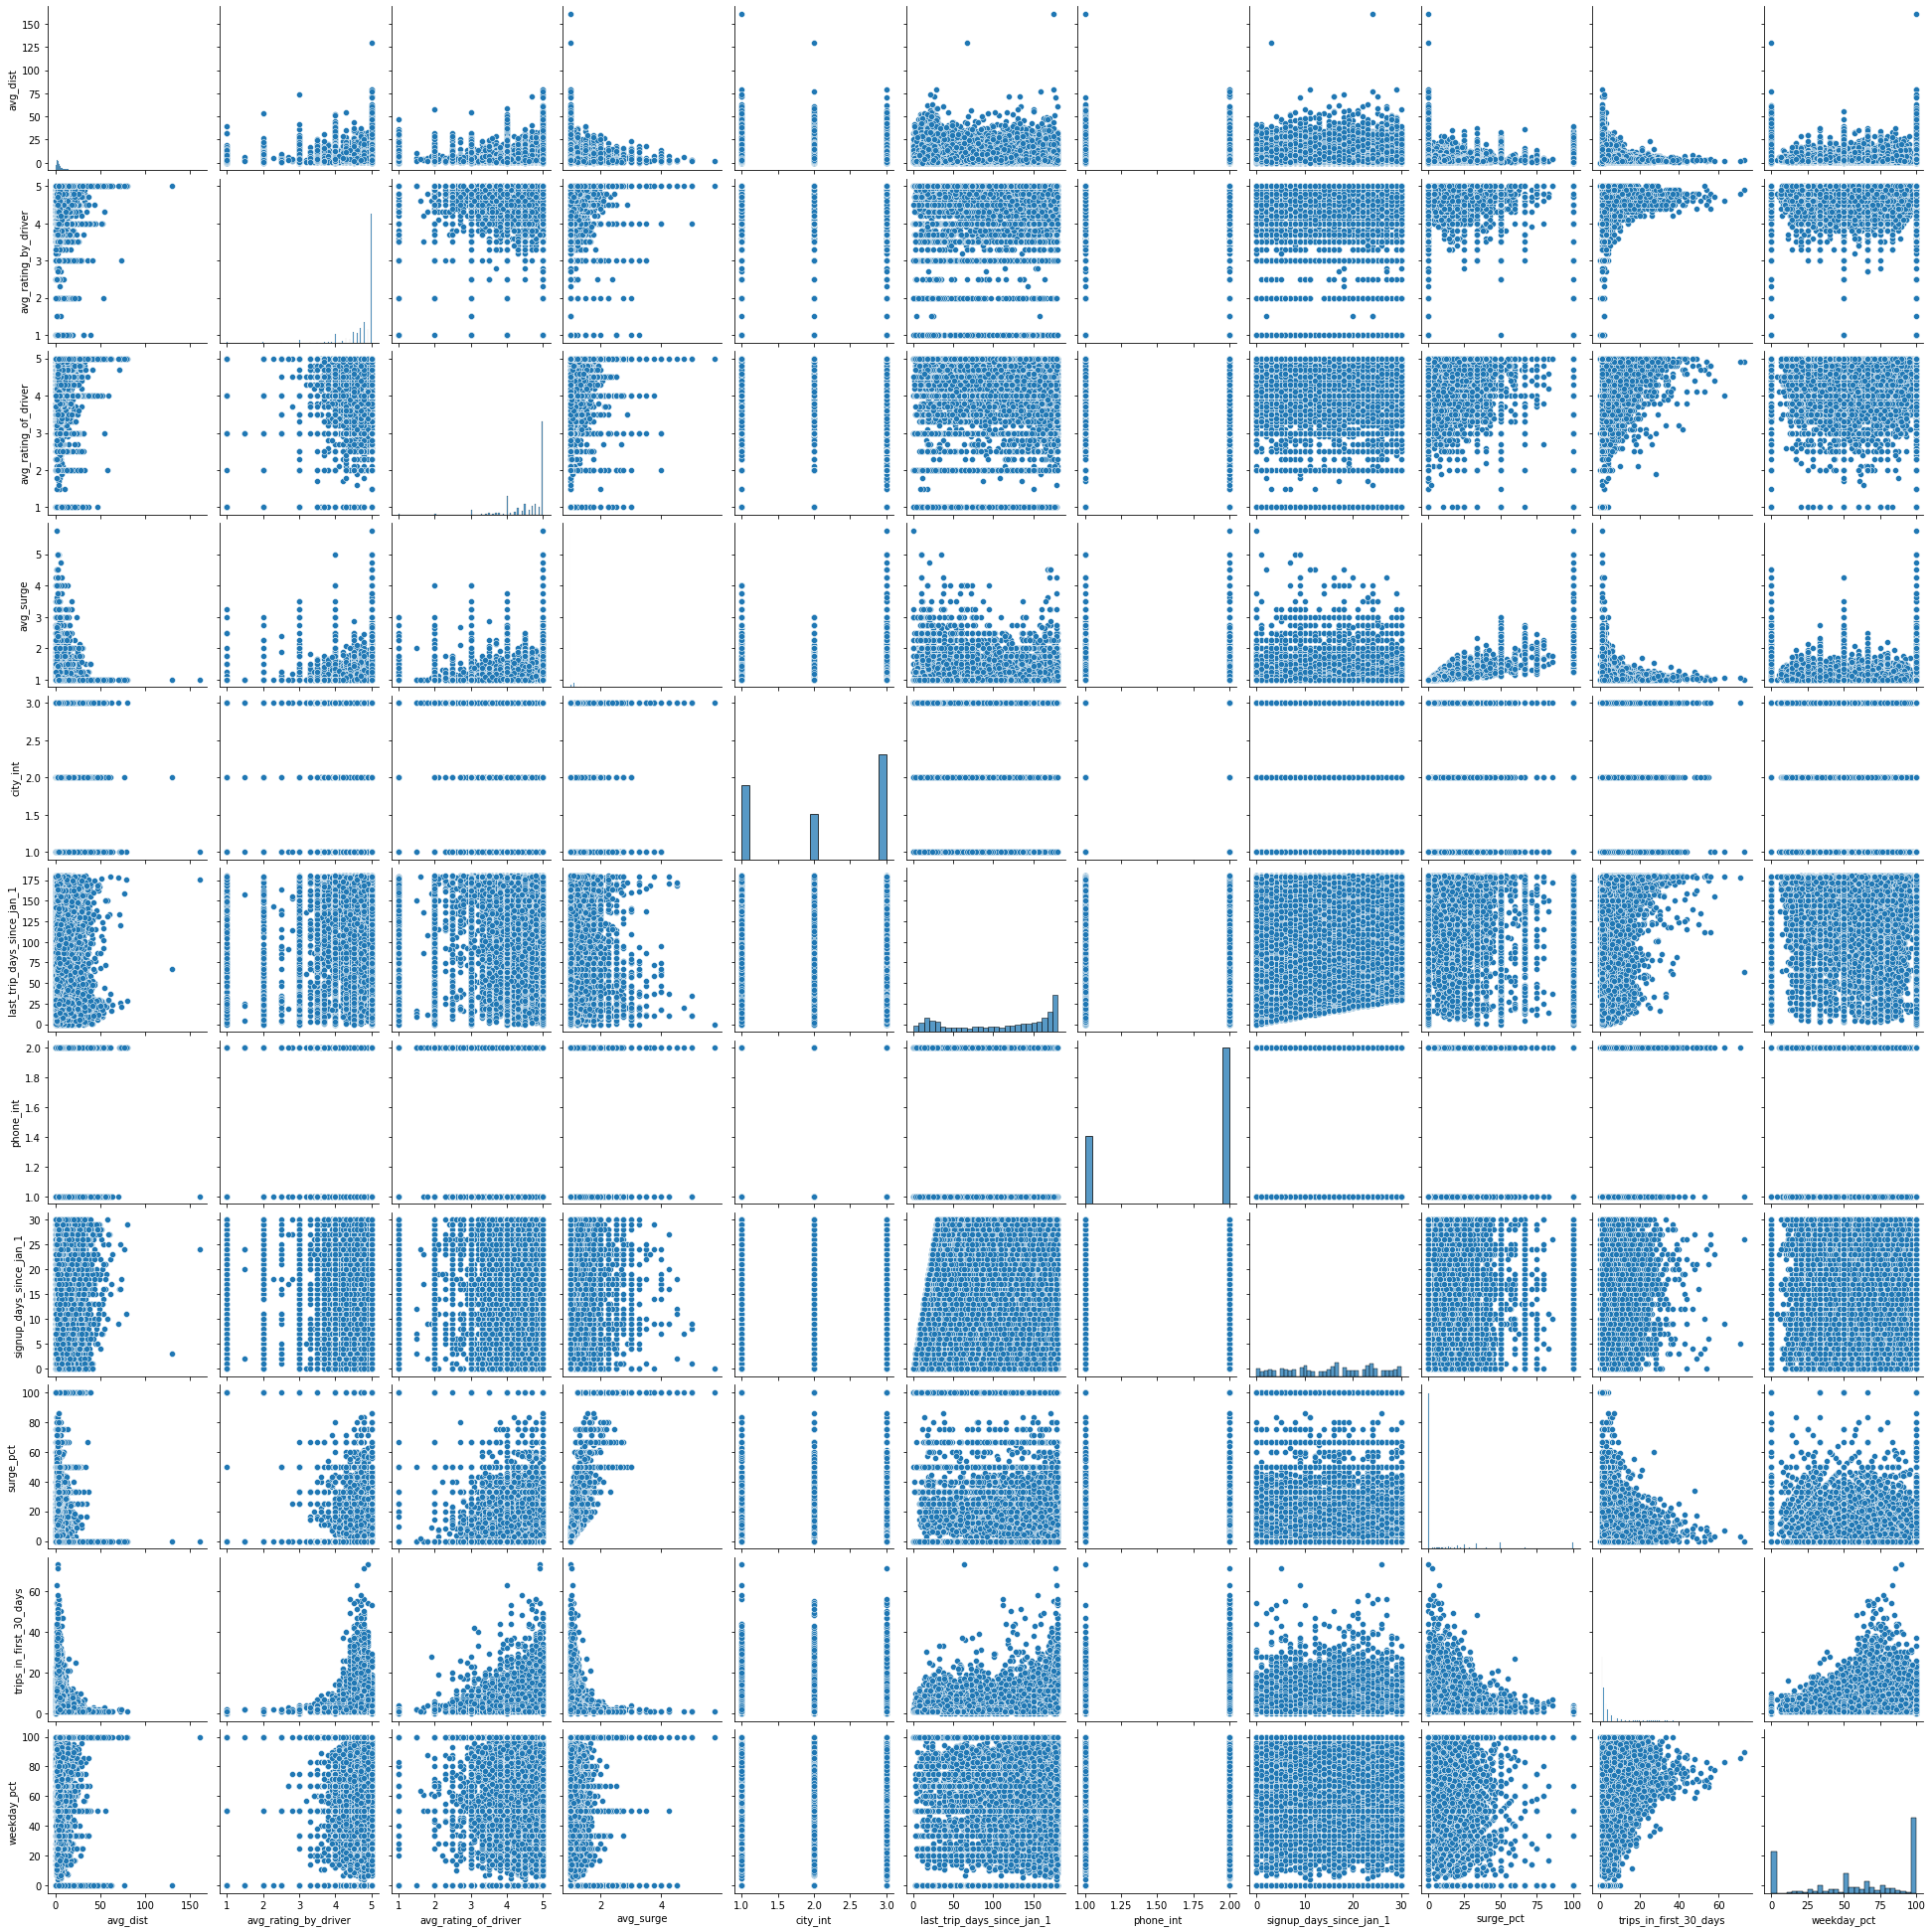

In [51]:
# Dropping boolean columns, leaving only numerical ones
sns.pairplot(clean_imp.drop(columns=['ultimate_black_user', 'active']))
plt.show()

Splitting the data before imputing missing data is required to avoid leaking fo the test data into training data. Fitting only on training data, then transforming the test data:

In [52]:
y = clean_imp['active']
X = clean_imp.drop(columns=['active'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [53]:
#Imputing the missing values
imp = IterativeImputer(random_state=0)
X_train_filled = pd.DataFrame(imp.fit_transform(X_train))
X_test_filled = pd.DataFrame(imp.transform(X_test))

In [54]:
X_train_filled.columns = X.columns
X_train_filled.index = X_train.index
X_train_filled.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_int,last_trip_days_since_jan_1,phone_int,signup_days_since_jan_1,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
count,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000
mean,5.798188,4.777090,4.604331,1.074364,2.137122,108.300846,1.696697,15.552574,8.855166,3.375884,0.376422,60.847486
std,5.641325,0.448245,0.564828,0.217495,0.882712,61.682522,0.457903,8.744020,20.000245,3.437826,0.484495,37.124033
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-9.300216,0.000000,0.000000
25%,2.440000,4.700000,4.500000,1.000000,1.000000,44.000000,1.000000,8.000000,0.000000,1.000000,0.000000,33.300000
50%,3.900000,5.000000,4.800000,1.000000,2.000000,127.000000,2.000000,16.000000,0.000000,2.850238,0.000000,66.700000
75%,6.950000,5.000000,5.000000,1.050000,3.000000,168.000000,2.000000,23.000000,8.500000,4.000261,1.000000,100.000000
max,129.890000,5.050280,5.000000,5.000000,3.000000,181.000000,2.000000,30.000000,100.000000,73.000000,1.000000,100.000000


In [55]:
clean_imp['avg_rating_by_driver'].value_counts().sort_index(ascending=False)

5.0    28507
4.9     3094
4.8     4536
4.7     3330
4.6     2078
4.5     2424
4.4      860
4.3     1018
4.2      342
4.1      125
4.0     1914
3.9       41
3.8      111
3.7      195
3.6       19
3.5      199
3.4        5
3.3       47
3.2        2
3.0      602
2.8        3
2.7        2
2.5       31
2.3        1
2.0      126
1.5        4
1.0      181
Name: avg_rating_by_driver, dtype: int64

In [56]:
X_train_filled.phone_int.value_counts().head()

2.000000    24197
1.000000    10527
1.845032        1
1.592023        1
1.628326        1
Name: phone_int, dtype: int64

Imputer assigned ratings of a max of 5.0. Reset those whoich are not 5.0 to 5.0. Also assigned float values to phone_int. Valid values are 1 and 2. Round values.

In [57]:
X_train_filled[X_train_filled['avg_rating_by_driver'] > 5.0]['avg_rating_by_driver']

41853    5.05028
Name: avg_rating_by_driver, dtype: float64

In [58]:
X_train_filled[X_train_filled['avg_rating_of_driver'] > 5.0]['avg_rating_of_driver']

Series([], Name: avg_rating_of_driver, dtype: float64)

In [59]:
X_train_filled.loc[X_train_filled['avg_rating_by_driver'] > 5.0, 'avg_rating_by_driver'] = 5.0
X_train_filled.loc[X_train_filled['avg_rating_of_driver'] > 5.0, 'avg_rating_of_driver'] = 5.0
X_train_filled = X_train_filled.round({'phone_int': 0})
X_train_filled.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_int,last_trip_days_since_jan_1,phone_int,signup_days_since_jan_1,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
count,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000
mean,5.798188,4.777088,4.604331,1.074364,2.137122,108.300846,1.699211,15.552574,8.855166,3.375884,0.376422,60.847486
std,5.641325,0.448244,0.564828,0.217495,0.882712,61.682522,0.458607,8.744020,20.000245,3.437826,0.484495,37.124033
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-9.300216,0.000000,0.000000
25%,2.440000,4.700000,4.500000,1.000000,1.000000,44.000000,1.000000,8.000000,0.000000,1.000000,0.000000,33.300000
50%,3.900000,5.000000,4.800000,1.000000,2.000000,127.000000,2.000000,16.000000,0.000000,2.850238,0.000000,66.700000
75%,6.950000,5.000000,5.000000,1.050000,3.000000,168.000000,2.000000,23.000000,8.500000,4.000261,1.000000,100.000000
max,129.890000,5.000000,5.000000,5.000000,3.000000,181.000000,2.000000,30.000000,100.000000,73.000000,1.000000,100.000000


In [60]:
X_train_filled.phone_int.value_counts()

2.0    24471
1.0    10527
Name: phone_int, dtype: int64

In [61]:
X_test_filled.index = X_test.index
X_test_filled.columns = X.columns
X_test_filled.describe()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_int,last_trip_days_since_jan_1,phone_int,signup_days_since_jan_1,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,5.834239,4.780630,4.599557,1.075233,2.133467,108.416400,1.697784,15.528267,8.829953,3.393696,0.378600,61.106127
std,5.842524,0.440129,0.572066,0.226304,0.882254,61.800967,0.457399,8.777103,19.849790,3.586151,0.485054,36.983677
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-9.937714,0.000000,0.000000
25%,2.410000,4.700000,4.500000,1.000000,1.000000,44.000000,1.000000,8.000000,0.000000,1.000000,0.000000,33.300000
50%,3.880000,5.000000,4.750108,1.000000,2.000000,127.000000,2.000000,16.000000,0.000000,2.898943,0.000000,66.700000
75%,6.990000,5.000000,5.000000,1.050000,3.000000,168.000000,2.000000,23.000000,8.700000,4.011292,1.000000,100.000000
max,160.960000,5.831170,5.241528,5.750000,3.000000,181.000000,2.000000,30.000000,100.000000,71.000000,1.000000,100.000000


In [62]:
X_test_filled[X_test_filled['avg_rating_by_driver'] > 5.0]['avg_rating_by_driver']

20701    5.83117
Name: avg_rating_by_driver, dtype: float64

In [63]:
X_test_filled[X_test_filled['avg_rating_of_driver'] > 5.0]['avg_rating_of_driver']

20701    5.241528
Name: avg_rating_of_driver, dtype: float64

In [64]:
X_test_filled.loc[X_test_filled['avg_rating_by_driver'] > 5.0, 'avg_rating_by_driver'] = 5.0
X_test_filled.loc[X_test_filled['avg_rating_of_driver'] > 5.0, 'avg_rating_of_driver'] = 5.0
X_test_filled = X_test_filled.round({'phone_int':0})
X_test_filled.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_int,last_trip_days_since_jan_1,phone_int,signup_days_since_jan_1,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,5.834239,4.780574,4.599540,1.075233,2.133467,108.416400,1.700333,15.528267,8.829953,3.393696,0.378600,61.106127
std,5.842524,0.440049,0.572051,0.226304,0.882254,61.800967,0.458127,8.777103,19.849790,3.586151,0.485054,36.983677
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-9.937714,0.000000,0.000000
25%,2.410000,4.700000,4.500000,1.000000,1.000000,44.000000,1.000000,8.000000,0.000000,1.000000,0.000000,33.300000
50%,3.880000,5.000000,4.750108,1.000000,2.000000,127.000000,2.000000,16.000000,0.000000,2.898943,0.000000,66.700000
75%,6.990000,5.000000,5.000000,1.050000,3.000000,168.000000,2.000000,23.000000,8.700000,4.011292,1.000000,100.000000
max,160.960000,5.000000,5.000000,5.750000,3.000000,181.000000,2.000000,30.000000,100.000000,71.000000,1.000000,100.000000


In [65]:
X_test_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 30521 to 24905
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_dist                    15000 non-null  float64
 1   avg_rating_by_driver        15000 non-null  float64
 2   avg_rating_of_driver        15000 non-null  float64
 3   avg_surge                   15000 non-null  float64
 4   city_int                    15000 non-null  float64
 5   last_trip_days_since_jan_1  15000 non-null  float64
 6   phone_int                   15000 non-null  float64
 7   signup_days_since_jan_1     15000 non-null  float64
 8   surge_pct                   15000 non-null  float64
 9   trips_in_first_30_days      15000 non-null  float64
 10  ultimate_black_user         15000 non-null  float64
 11  weekday_pct                 15000 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


Converting the categorical features to dummy variables.

In [66]:
X_train_dummy = pd.get_dummies(X_train_filled, columns=['city_int', 'phone_int', 'ultimate_black_user'], drop_first=True)
X_train_dummy.index = X_train.index
X_test_dummy = pd.get_dummies(X_test_filled, columns=['city_int', 'phone_int', 'ultimate_black_user'], drop_first=True)
X_test_dummy.index = X_test.index

In [67]:
X_train_dummy.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_days_since_jan_1,signup_days_since_jan_1,surge_pct,trips_in_first_30_days,weekday_pct,city_int_2.0,city_int_3.0,phone_int_2.0,ultimate_black_user_1.0
44212,7.76,4.3,5.0,1.00,137.0,26.0,0.0,1.00000,33.3,0,0,0,0
32738,2.57,4.5,4.9,1.13,179.0,24.0,10.0,4.00000,25.0,0,1,0,0
9921,2.30,4.5,5.0,1.00,169.0,15.0,0.0,1.00000,100.0,0,1,1,1
42634,3.07,5.0,5.0,1.25,20.0,19.0,100.0,1.00000,100.0,0,1,1,0
15963,3.14,5.0,5.0,1.00,49.0,6.0,0.0,3.02411,100.0,0,1,1,0


Scaling the numerical features with StandardScaler:

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cont_cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'last_trip_days_since_jan_1', 
             'signup_days_since_jan_1', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
scaled_X_train_cont = pd.DataFrame(scaler.fit_transform(X_train_filled[cont_cols]))
scaled_X_test_cont = pd.DataFrame(scaler.transform(X_test_filled[cont_cols]))
scaled_X_train_cont.columns = cont_cols
scaled_X_train_cont.index = X_train.index
scaled_X_test_cont.columns = cont_cols
scaled_X_test_cont.index = X_test.index

Scaled and dummy features are melted into one dataframe:


In [69]:
#X_train_dummy = X_train_dummy[['city_int_1.0', 'city_int_2.0', 'city_int_3.0', 'phone_int_1.0', 'phone_int_2.0', 
#                               'ultimate_black_user_0.0', 'ultimate_black_user_1.0']]
#X_test_dummy = X_test_dummy[['city_int_1.0', 'city_int_2.0', 'city_int_3.0', 'phone_int_1.0', 'phone_int_2.0', 
#                             'ultimate_black_user_0.0', 'ultimate_black_user_1.0']]
X_train_dummy = X_train_dummy[['city_int_2.0', 'city_int_3.0', 'phone_int_2.0', 'ultimate_black_user_1.0']]
X_test_dummy = X_test_dummy[['city_int_2.0', 'city_int_3.0', 'phone_int_2.0', 'ultimate_black_user_1.0']]
X_train_processed = pd.concat([scaled_X_train_cont, X_train_dummy],axis='columns')
X_test_processed = pd.concat([scaled_X_test_cont, X_test_dummy],axis='columns')

Correlation heatmap to visualize the strenth between all the features:


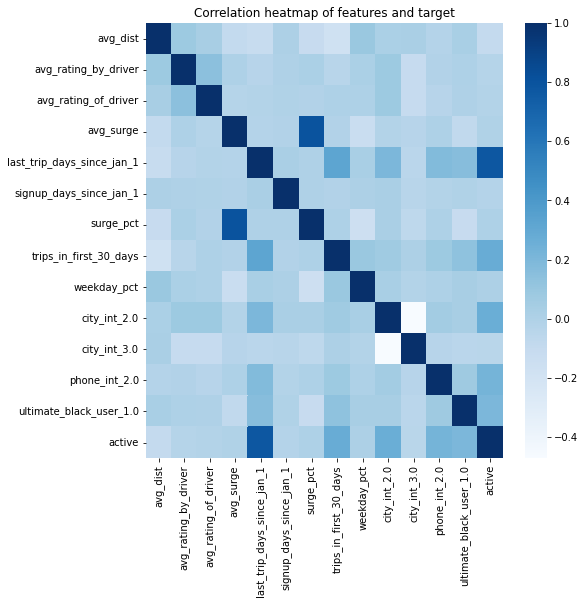

In [72]:
# calculate the correlation matrix of the processed data. 
corr_df = pd.concat([X_train_processed, y_train], axis=1)
corr = corr_df.corr()

# plot the heatmap
fig = plt.figure(figsize=(8, 8)) 
sns.heatmap(corr, cmap="Blues",
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title('Correlation heatmap of features and target')
plt.show()

According to the heatmap above, there is low to no correlation between several features. 

It is important to catch that the surge_pct and avg_surge are strongly correlated. I must eliminate one column.

In [73]:
X_train_processed = X_train_processed.drop(columns=['last_trip_days_since_jan_1', 'avg_surge']).to_numpy()

In [74]:
X_test_processed = X_test_processed.drop(columns=['last_trip_days_since_jan_1', 'avg_surge']).to_numpy()

In [75]:
X_train_processed.shape, y_train.shape

((34998, 11), (34998,))

In [76]:
X_test_processed.shape, y_test.shape

((15000, 11), (15000,))

###4.1 Logistic Regression Modeling

In [77]:
clf = LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced').fit(X_train_processed, y_train)
print('Test accuracy with default hyperparameters: {}'.format(accuracy_score(clf.predict(X_test_processed), y_test)))

Test accuracy with default hyperparameters: 0.7110666666666666


In [80]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(class_weight='balanced')

# define parameter values
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train_processed, y_train)
# summarize results
print(f"Best score on training data: {grid_result.best_score_} using {grid_result.best_params_}")
model = grid_search.best_estimator_
y_pred = model.predict(X_test_processed)
print('Best score on test data: {}'.format(accuracy_score(y_pred, y_test)))

Best score on training data: 0.7254127446778111 using {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Best score on test data: 0.7213333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is no

In [81]:
from sklearn.metrics import classification_report
target_names = ['Not Active', 'Active']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Not Active       0.78      0.77      0.77      9359
      Active       0.63      0.64      0.63      5641

    accuracy                           0.72     15000
   macro avg       0.70      0.71      0.70     15000
weighted avg       0.72      0.72      0.72     15000



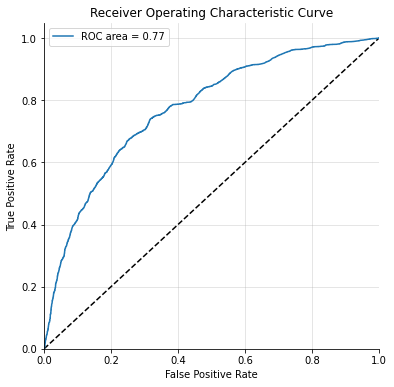

In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_df(clf, X_test, y_test, figsize=(12, 6)):
    """
    Plot roc and calculate roc_auc for binary model supporting .decision_function().
    
    Input: 
        clf: Trained  binary Classifier
        X_test: Test feature dataset to be used to get prediction probabilities for classifier
        y_test: True class values for test features in shape [n_samples,]
        figsize: Figure size of plot, optional
    """
    y_score = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1.0)
    roc_auc = auc(fpr, tpr)

    # plot roc 
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic Curve')
    ax.plot(fpr, tpr, label='ROC area = %0.2f' % (roc_auc))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_roc_df(model, X_test_processed, y_test, figsize=(6, 6))

###4.2 Random Forest Model 

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
max_depth_param = 15




NameError: ignored